# Data Introduction : 
# The given Website : worldometers had a Dat Resource of Populations among countries with the Percentages of how the population has increased yearwise
# The Age wise , Urban wise, Migrants wise, Fertility wise population of every country 
# We can clearly estimate how the population of each and every country is chnaging on what basis. By that countries will take actions accordingly to overcome challanges in the feature and to facilitate issued in an effective manner

In [124]:
# for web scraping
import requests
from bs4 import BeautifulSoup

# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Webscraping by requesting the host with the help of "Requests function"
url = 'https://www.worldometers.info/world-population/population-by-country/'
requests.get(url)
page = requests.get(url)

soup = BeautifulSoup(page.text, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Population by Country (2022) - Worldometer
  </title>
  <meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" siz

In [3]:
# extracting the table with the help of "beautifulsoup"
table_data = soup.find('table')
print(table_data.prettify())

<table cellspacing="0" class="table table-striped table-bordered" id="example2" width="100%">
 <thead>
  <tr>
   <th>
    #
   </th>
   <th>
    Country (or dependency)
   </th>
   <th>
    Population
    <br/>
    (2020)
   </th>
   <th>
    Yearly
    <br/>
    Change
   </th>
   <th>
    Net
    <br/>
    Change
   </th>
   <th>
    Density
    <br/>
    (P/Km²)
   </th>
   <th>
    Land Area
    <br/>
    (Km²)
   </th>
   <th>
    Migrants
    <br/>
    (net)
   </th>
   <th>
    Fert.
    <br/>
    Rate
   </th>
   <th>
    Med.
    <br/>
    Age
   </th>
   <th>
    Urban
    <br/>
    Pop %
   </th>
   <th>
    World
    <br/>
    Share
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    1
   </td>
   <td style="font-weight: bold; font-size:15px; text-align:left">
    <a href="/world-population/china-population/">
     China
    </a>
   </td>
   <td style="font-weight: bold;">
    1,439,323,776
   </td>
   <td>
    0.39 %
   </td>
   <td>
    5,540,090
   </td>
   <td>
    1

In [4]:
# extracting the table data and assigning the headers pf table to Column Names for the Data Frame
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)

df = pd.DataFrame(columns = headers)

for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df)
        df.loc[length] = row

# Initial Analysing of the Data Frame

In [5]:
df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,233,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [6]:
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [7]:
df.tail()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,231,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,233,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %
234,235,Holy See,801,0.25 %,2,"2,003",0,,N.A.,N.A.,N.A.,0.00 %


In [8]:
df.describe()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,235,235,235,235,235,235,235,235,235,235,235,235
unique,235,235,235,174,234,165,226,159,51,35,81,74
top,1,China,"1,439,323,776",1.48 %,68,25,460,,N.A.,N.A.,N.A.,0.00 %
freq,1,1,1,4,2,8,3,34,34,34,13,56


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        235 non-null    object
 1   Country (or dependency)  235 non-null    object
 2   Population (2020)        235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density (P/Km²)          235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           235 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: object(12)
memory usage: 23.9+ KB


In [10]:
df.dtypes

#                          object
Country (or dependency)    object
Population (2020)          object
Yearly Change              object
Net Change                 object
Density (P/Km²)            object
Land Area (Km²)            object
Migrants (net)             object
Fert. Rate                 object
Med. Age                   object
Urban Pop %                object
World Share                object
dtype: object

# With the help of above data
### 1. We will see that every attribute has same data type which is wrong.
###   - So, we need to change the datatype of each and every attribute by seeing the data pr values of the data frame

### 2. By seeing the dataframe we have seen there is no similarity in the values of each individual column. So, that python will not understand the data.
###  - We need to eleiminate or replace the anomolies with the proper data

### 3. It is observed that data has null values, empty values.So, we have to treat those values to do some statistical measures.

### 4. And we can change the column names also which are not proper to read easily to understand the data

In [11]:
df.columns

Index(['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

## Replacing the unwanted type of values with appropriate values in the attributes

In [12]:
for i in range (len(df['Population (2020)'])):
    df['Population (2020)'][i]=df['Population (2020)'][i].replace(',','')

In [13]:
for i in range (len(df['Yearly Change'])):
    df['Yearly Change'][i]=df['Yearly Change'][i].replace('%','')

In [14]:
for i in range (len(df['Net Change'])):
    df['Net Change'][i]=df['Net Change'][i].replace(',','')

In [15]:
for i in range (len(df['Urban Pop %'])):
    df['Urban Pop %'][i]=df['Urban Pop %'][i].replace('%','')

In [16]:
for i in range (len(df['World Share'])):
    df['World Share'][i]=df['World Share'][i].replace('%','')

In [17]:
for i in range (len(df['Density (P/Km²)'])):
    df['Density (P/Km²)'][i]=df['Density (P/Km²)'][i].replace('%','')

In [18]:
for i in range(len(df['Land Area (Km²)'])):
    df['Land Area (Km²)'][i]=df['Land Area (Km²)'][i].replace(',','')

In [19]:
for i in range(len(df['Migrants (net)'])):
    df['Migrants (net)'][i]=df['Migrants (net)'][i].replace(',','')

In [20]:
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83


## Se we can check and see in the above,that data in the columns is cleaned and good to go

In [21]:
df.nunique()

#                          235
Country (or dependency)    235
Population (2020)          235
Yearly Change              174
Net Change                 234
Density (P/Km²)            165
Land Area (Km²)            226
Migrants (net)             159
Fert. Rate                  51
Med. Age                    35
Urban Pop %                 81
World Share                 74
dtype: int64

### We can observe that data has some unique values also

In [32]:
df.isnull().sum()

#                          0
Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

### In the above it is showing that we dont have null values, but looking at data frame we can clearly see null values are there.
### So, we have treat those to perform Statistical measures

In [33]:
for i in df.columns:
    df[i].replace("N.A."," ",inplace=True)

In [34]:
df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06,3,50,100,,,,10,0.00
231,232,Falkland Islands,3480,3.05,103,0,12170,,,,66,0.00
232,233,Niue,1626,0.68,11,6,260,,,,46,0.00
233,234,Tokelau,1357,1.27,17,136,10,,,,0,0.00


In [35]:
df.isnull().sum()

#                          0
Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

In [22]:
df.columns

Index(['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

## We need to change the data types of the features to see the null values and perform some measures

In [52]:
df = df.astype({"#": int,"Yearly Change":float,"Net Change":int,"Land Area (Km²)":int,"Migrants (net)":float,"Fert. Rate":float,"Med. Age":int,"Urban Pop %":int,"World Share":float}, errors='ignore')


In [94]:
df["Density (P/Km²)"] = pd.to_numeric(df["Density (P/Km²)"], errors='coerce').astype('Int32')
df["Fert. Rate"] = pd.to_numeric(df["Fert. Rate"], errors='coerce')
df["Med. Age"] = pd.to_numeric(df["Med. Age"], errors='coerce').astype('Int32')
df["Urban Pop %"] = pd.to_numeric(df["Urban Pop %"], errors='coerce').astype('Int32')

In [72]:
df = df.astype({"Population (2020)": int})
df = df.astype({"Net Change": int})

df.dtypes

Ranking                      int32
Country (or dependency)     object
Population (2020)            int32
Yearly Change              float64
Net Change                   int32
Density (P/Km²)              Int32
Land Area (Km²)              int32
Migrants (net)             float64
Fert. Rate                 float64
Med. Age                     Int32
Urban Pop %                  Int32
World Share                float64
dtype: object

# 3) No.of Rows and Columns

In [73]:
df.shape

(235, 12)

## We have 235 rows and 12 columns in the data

# 4) Reporting of Missing values in the data set

In [95]:
df.isnull().sum()

Ranking                     0
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)            12
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

# 5) Renaming the columns

In [60]:
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153.0,9388211,-348399.0,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464.0,2973190,-532687.0,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36.0,9147420,954806.0,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151.0,1811570,-98955.0,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287.0,770880,-233379.0,3.6,23,35,2.83


In [61]:
df.columns

Index(['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [62]:
df.columns = df.columns.str.replace('#', 'Ranking')

In [63]:
df.columns

Index(['Ranking', 'Country (or dependency)', 'Population (2020)',
       'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)',
       'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %',
       'World Share'],
      dtype='object')

## Comment : Successfully we changed the 1st column name from "#"(hash) to "Ranking" for the conutries depends upon populations
## Here, the special thing is we cannot chnage or rename the column name with sepcial characters, it has treat in the pserate way as like above done.

In [69]:
df.head()

,Ranking,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153.0,9388211,-348399.0,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464.0,2973190,-532687.0,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36.0,9147420,954806.0,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151.0,1811570,-98955.0,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287.0,770880,-233379.0,3.6,23,35,2.83


# 6) Top 3 countries based on the density column

In [83]:
top3 = df.sort_values('Density (P/Km²)',ascending=False)[["Country (or dependency)","Density (P/Km²)"]].iloc[:3]
top3

,Country (or dependency),Density (P/Km²)
190,Channel Islands,915
120,State of Palestine,847
172,Micronesia,784


## Comment :-   Actually the above Top Density wise coutries are wrong, some error is hapened . I tried and rechecked everthing but the same values I'm geting

# 7) Which country has the highest fertility rate and which country has the lowest fertility rate?

In [100]:
highest_fertility_rate  = df.sort_values('Fert. Rate',ascending=False)[["Country (or dependency)","Fert. Rate"]].iloc[:1]
highest_fertility_rate

,Country (or dependency),Fert. Rate
55,Niger,7.0


### Comment :-    Niger country has the Highest Fertility rate with "7.0"

In [101]:
Lowest_fertility_rate  = df.sort_values('Fert. Rate')[["Country (or dependency)","Fert. Rate"]].iloc[:1]
Lowest_fertility_rate 

,Country (or dependency),Fert. Rate
27,South Korea,1.1


### Comment :-   South Korea country has the Lowest Fertility rate with "1.1"

# 8) Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.


### Comment :-  Distribution of Population

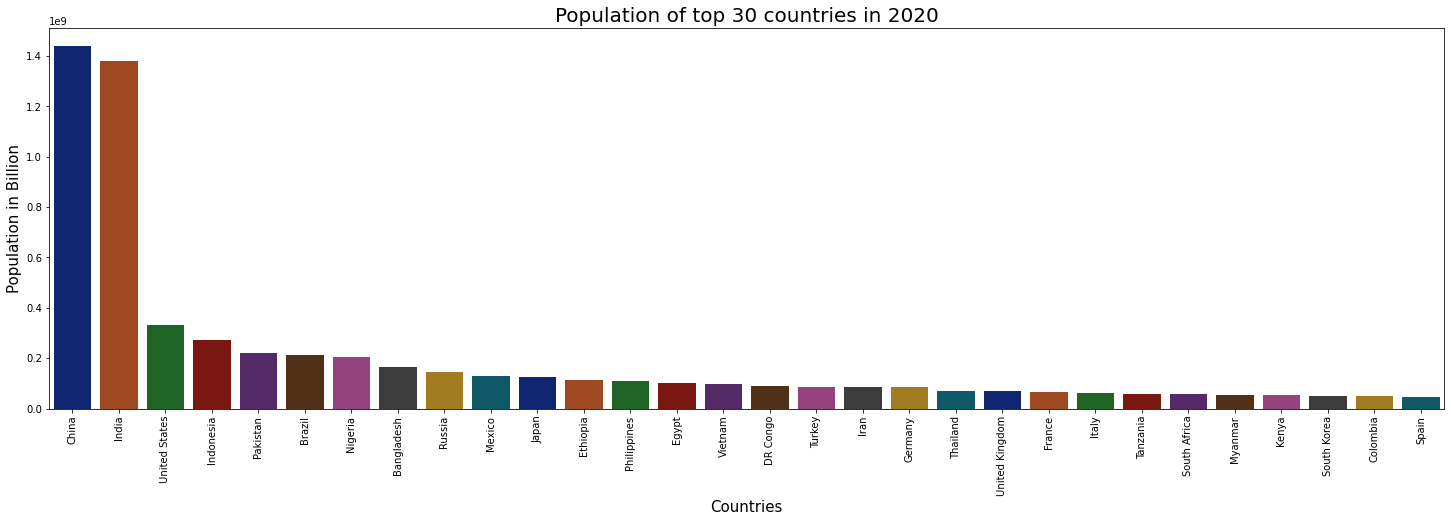

In [109]:
plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = df["Country (or dependency)"][:30], y = df["Population (2020)"][:30], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 15)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 15)
ax.set_title(label = 'Population of top 30 countries in 2020', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Comment :-  Distribution of Population

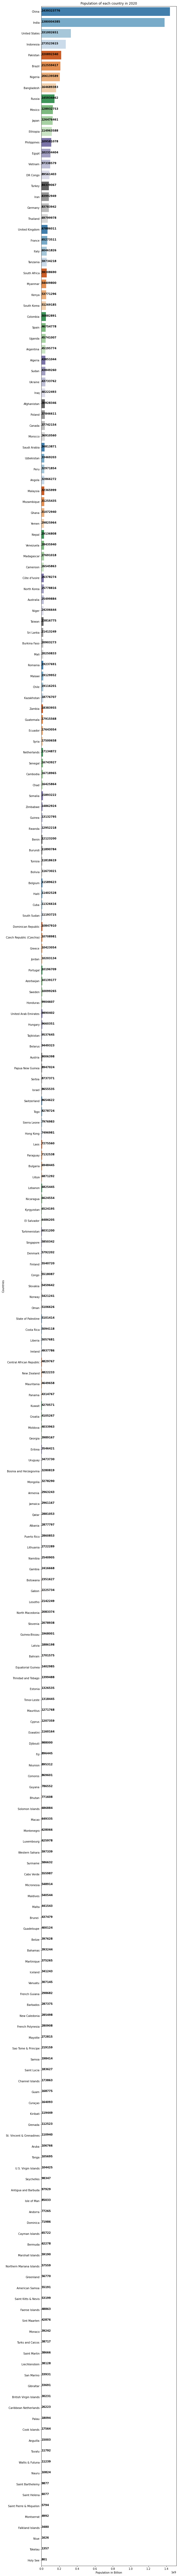

In [130]:
plt.figure(figsize=(9,175))
ax = sns.barplot(x="Population (2020)", y="Country (or dependency)",
                 data=df, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(df["Population (2020)"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Population of each country in 2020")
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

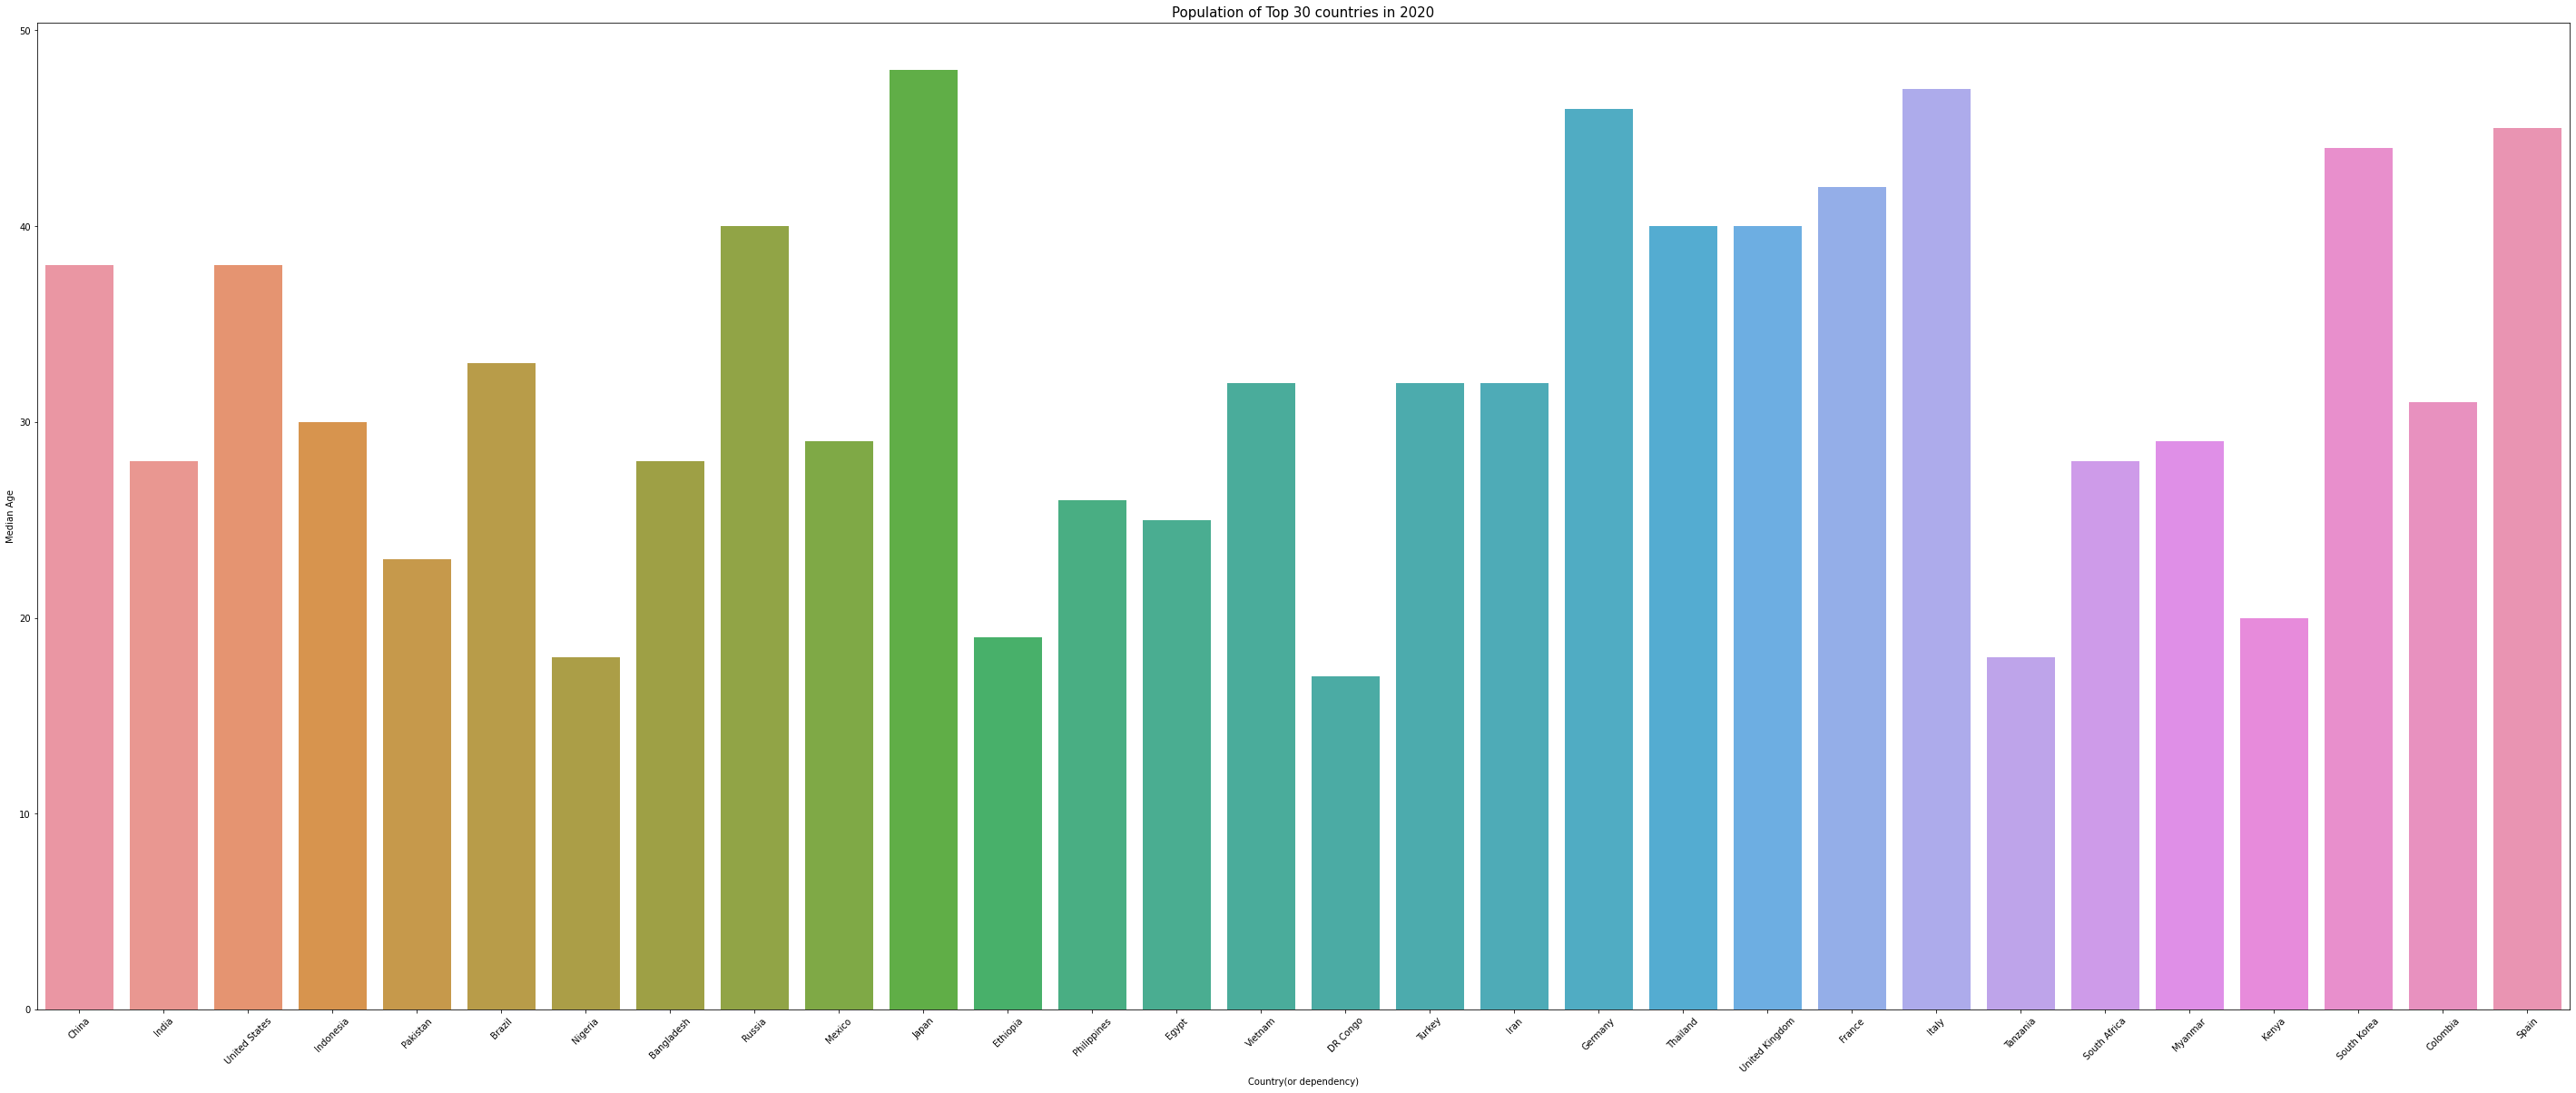

In [118]:
plt.figure(figsize=(50,20))
sns.barplot(x = df["Country (or dependency)"][:30], y = df["Med. Age"])
plt.title('Population of Top 30 countries in 2020',fontsize=15)
plt.ylabel('Median Age')
plt.xlabel('Country(or dependency)')
plt.xticks(rotation=45)
plt.show()

### Comment :-  Distribution of Urban Population among the top 30 countries(All the data to show is looking ugly, that's why I considered only 30 countries population)

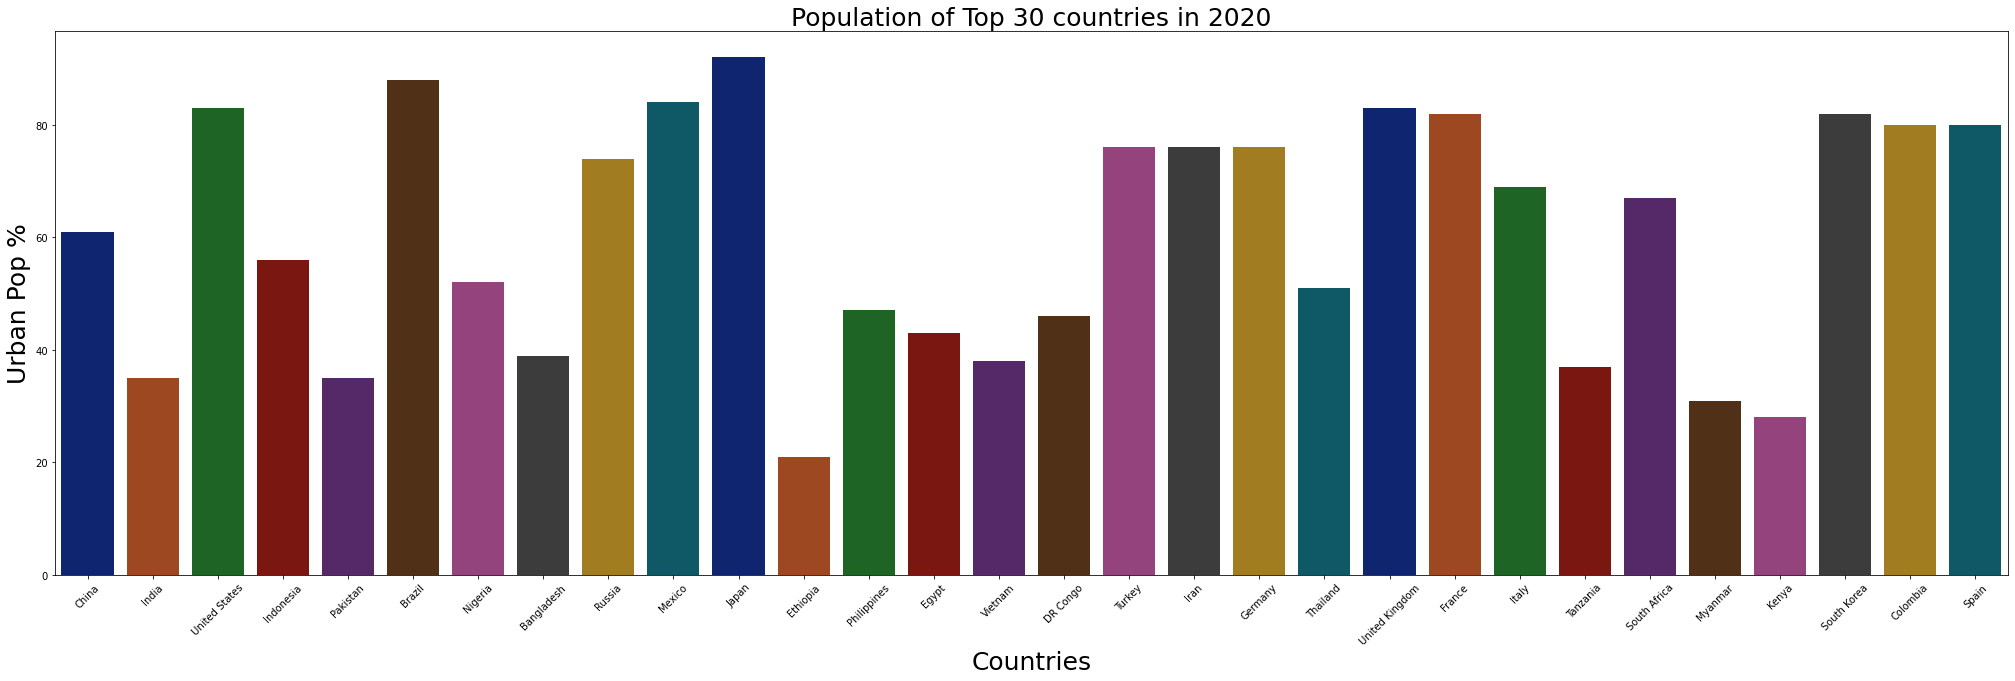

In [119]:
plt.figure(figsize=(35,10))
sns.barplot(x = df["Country (or dependency)"][:30], y = df['Urban Pop %'][:30], palette = 'dark')
plt.title('Population of Top 30 countries in 2020',fontsize=25)
plt.xlabel('Countries',fontsize=25)
plt.ylabel('Urban Pop %',fontsize=25)
plt.xticks(rotation=45)
plt.show()

### Comment :-  Distribution of Urban Population in Percentage (All the data to show is looking ugly, that's why I considered only 30 countries population)

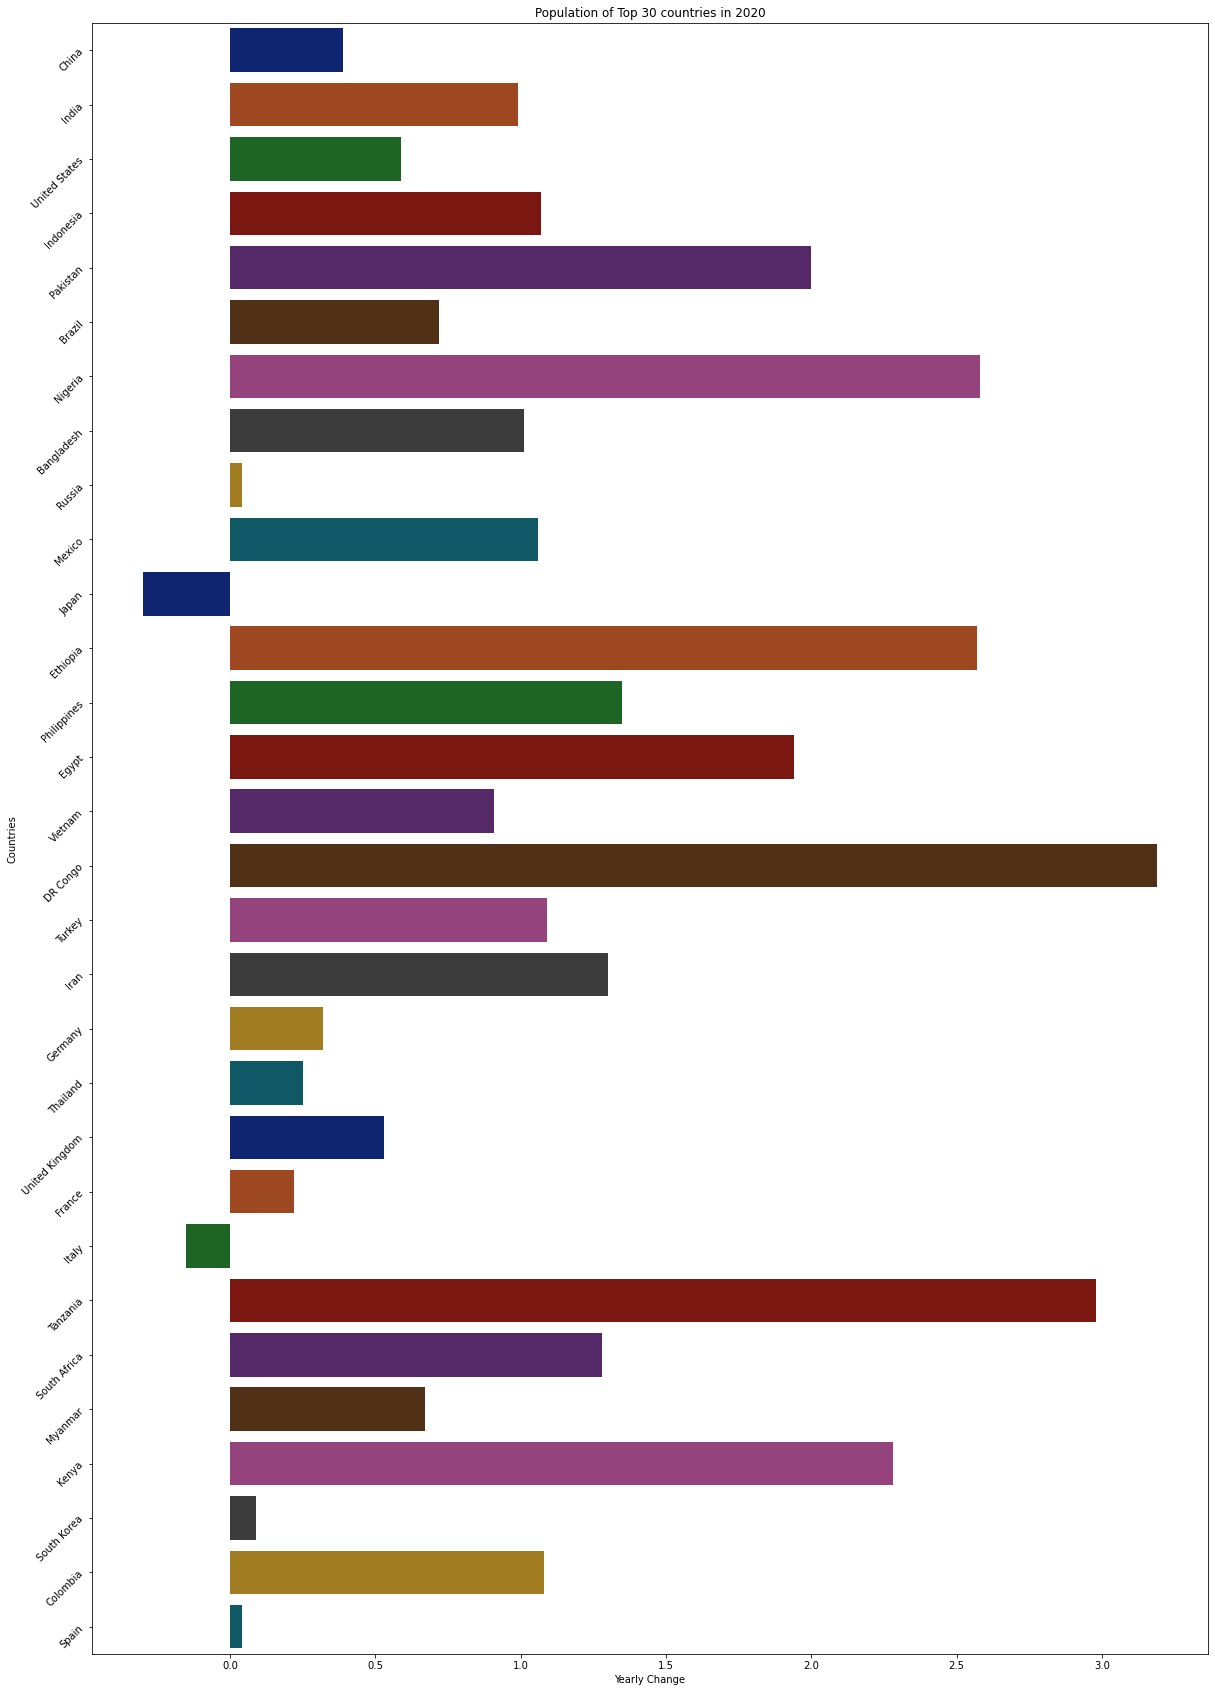

In [120]:
plt.figure(figsize=(20,30))
sns.barplot(y = df["Country (or dependency)"][:30], x = df['Yearly Change'],palette="dark")
plt.title('Population of Top 30 countries in 2020')
plt.xlabel('Yearly Change')
plt.ylabel('Countries')
plt.yticks(rotation=45)
plt.show()

# 9) Please sort the population column based on lowest populated countries.

In [99]:

Lowest_Population_Countries = df.sort_values('Population (2020)')[["Country (or dependency)","Population (2020)"]].iloc[:1]
Lowest_Population_Countries

,Country (or dependency),Population (2020)
234,Holy See,801


### Comment :-  The Lowest Population Country is HolySee of 801 members only